In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_df=pd.read_pickle('../data/processed/1_processed_df.pkl')
features_df = pd.read_pickle('../data/processed/features_skills_clusters.pkl')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     83439 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       83439 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [4]:
role_col=["DevType"]
lang_col=["LanguageHaveWorkedWith",
          'DatabaseHaveWorkedWith',
          'PlatformHaveWorkedWith',
          'WebframeHaveWorkedWith',
          'MiscTechHaveWorkedWith',
          'ToolsTechHaveWorkedWith',
          'NEWCollabToolsHaveWorkedWith']

df = raw_df.copy()
encoded_dfs = {}

for col in role_col + lang_col:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df

In [5]:
encoded_dfs=pd.concat(encoded_dfs,axis=1)

In [6]:
encoded_dfs

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [7]:
# Select random int
i = np.random.randint(raw_df.shape[0])

# Print original values
print(raw_df.iloc[i][role_col].tolist())
print(raw_df.iloc[i][lang_col].tolist())
print("----------------")

# Print processed
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print("----------------")

[['Developer, full-stack', 'Data scientist or machine learning specialist', 'Developer, game or graphics']]
[['HTML/CSS', 'JavaScript', 'Node.js', 'Python'], [], ['Google Cloud Platform', 'Microsoft Azure'], ['Vue.js'], ['Apache Spark', 'Keras', 'NumPy', 'Pandas', 'TensorFlow'], ['Git'], ['Notepad++', 'PyCharm', 'Visual Studio Code']]
----------------
DevType                       Data scientist or machine learning specialist    1
                              Developer, full-stack                            1
                              Developer, game or graphics                      1
LanguageHaveWorkedWith        HTML/CSS                                         1
                              JavaScript                                       1
                              Node.js                                          1
                              Python                                           1
PlatformHaveWorkedWith        Google Cloud Platform                            

In [8]:
EXCULDE_ROLES = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']

for role in EXCULDE_ROLES :
    encoded_dfs=encoded_dfs.drop(('DevType',role),axis=1)

In [9]:
# Check the total samples of roles
original_role_sum = encoded_dfs["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               2899
Data or business analyst                          3792
Data scientist or machine learning specialist     4273
Database administrator                            5655
DevOps specialist                                 7058
Developer, QA or test                             3611
Developer, back-end                              29071
Developer, desktop or enterprise applications    11036
Developer, embedded applications or devices       4598
Developer, front-end                             18231
Developer, full-stack                            32891
Developer, game or graphics                       2112
Developer, mobile                                 9800
Engineer, data                                    4176
Scientist                                         2015
System administrator                              6079
dtype: int64

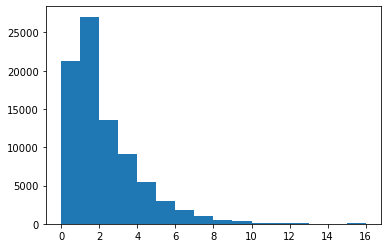

In [10]:
freq_roles=encoded_dfs['DevType'].sum(axis=1)
plt.hist(freq_roles,freq_roles.max())
plt.show()

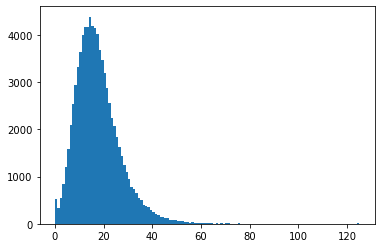

In [11]:
freq_tech=encoded_dfs[lang_col].sum(axis=1)
plt.hist(freq_tech,freq_tech.max())
plt.show()

In [12]:
roles_range=[1,4]
tech_range=[3,25]

In [13]:
role_mask=(freq_roles>=roles_range[0]) & (freq_roles <= roles_range[1])
tech_mask=(freq_tech >= tech_range[0]) & (freq_tech <= tech_range[1])

filter_mask=role_mask & tech_mask

In [14]:
features_df = features_df.loc[filter_mask].copy()
encoded_dfs=encoded_dfs.loc[filter_mask].copy()

In [15]:
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])

In [16]:
df_2 = pd.concat([encoded_dfs, features_df], axis=1)

In [17]:
df_2.to_pickle('../data/processed/2_cleaned_data.pkl')